In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[1.1 1.3 1.5 2.  2.2 2.9 3.  3.2 3.2 3.7]
[39343. 46205. 37731. 43525. 39891. 56642. 60150. 54445. 64445. 57189.]


In [2]:
#loading the dataset
x_train, y_train = load_data()

In [3]:
#printing xtrain and ytrain
print(type(x_train))
print(type(y_train))
print(x_train[:10])
print(y_train[:10])


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[1.1 1.3 1.5 2.  2.2 2.9 3.  3.2 3.2 3.7]
[39343. 46205. 37731. 43525. 39891. 56642. 60150. 54445. 64445. 57189.]


In [4]:
#printing shapes and no.of.training Examples
print("Shape of X_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Number of training Examples(m) :", len(x_train))


Shape of X_train : (35,)
Shape of y_train : (35,)
Number of training Examples(m) : 35


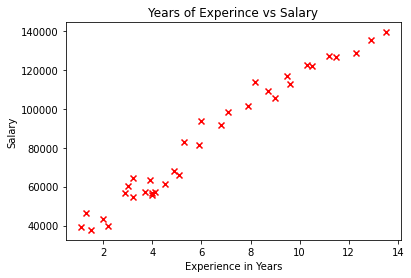

In [5]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Years of Experince vs Salary")
# Set the y-axis label
plt.ylabel('Salary')
# Set the x-axis label
plt.xlabel('Experience in Years')
plt.show()

            

In [71]:
#Computing The Cost for Cost Function That We Use Later.
def compute_cost(x, y, w, b):
    
    total_cost = 0
    
    cost_sum = 0
    
    m = x.shape[0]
    
    for i in range(m):
      f_wb = w * x[i] + b
      cost = (f_wb - y[i])**2
      cost_sum = cost_sum + cost
    total_cost = (1/(2*m))*(cost_sum)
    
    
    return total_cost


In [72]:
initial_w = 1
initial_b = 1
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print("The Cost at initial :\n",cost)

The Cost at initial :
 4025148406.482


In [74]:
#Computing Gradient Descent for Gradient Descent Function 
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i])*x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db

In [75]:
i_w = 0
i_b = 0
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, i_w, i_b)
print("Gradient Descent at initial : ", tmp_dj_dw, tmp_dj_db)

Gradient Descent at initial :  -640648.9571428571 -83945.6


In [227]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)
    j_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        if i<100000:
            cost = cost_function(x, y, w, b)
            j_history.append(cost/1000000)
            
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:2}: Cost {j_history[-1]:10.2f}  ")
                                                   
    return w, b, j_history, w_history

In [231]:
i_w = 0
i_b = 0

iterations = 10000
alpha = 0.01

w,b,j_history,_ = gradient_descent(x_train ,y_train, i_w, i_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print(f"w,b found by gradient descent: w = {w}, b = {b}")

Iteration  0: Cost     963.13  
Iteration 1000: Cost      18.26  
Iteration 2000: Cost      17.51  
Iteration 3000: Cost      17.50  
Iteration 4000: Cost      17.50  
Iteration 5000: Cost      17.50  
Iteration 6000: Cost      17.50  
Iteration 7000: Cost      17.50  
Iteration 8000: Cost      17.50  
Iteration 9000: Cost      17.50  
w,b found by gradient descent: w = 8731.94104720006, b = 28859.52619339145


In [233]:
j_history_new = np.asarray(j_history)

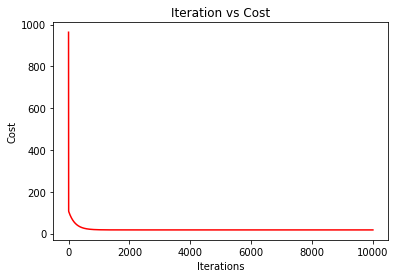

In [234]:
plt.plot(range(0, 10000), j_history_new, c='r')
plt.title('Iteration vs Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [118]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0, 0.5, 'Salary')

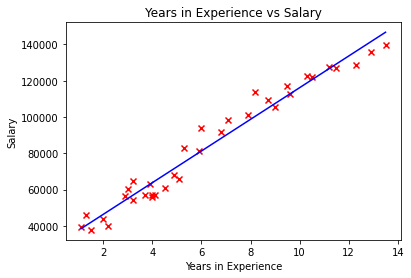

In [36]:
plt.plot(x_train, predicted, c= 'b')
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Years in Experience vs Salary")
plt.xlabel("Years in Experience")
plt.ylabel("Salary")

In [124]:
predict1 = 1 * w + b

predicted_value = "{:.2f}".format(predict1)

print(f"Predicted Salary for One Years of Experience is {predicted_value}")

Predicted Salary for One Years of Experience is 37591.31
